In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing data

In [5]:
advdf=pd.read_csv("advertising.csv")
advdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Checking  for Null values

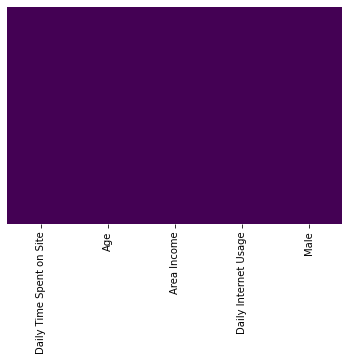

In [19]:
sns.heatmap(advdf[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']].isnull(),yticklabels=False,cmap='viridis',cbar=False)

spliting into testing and training data and building logistic model

In [15]:
features_train,features_test,label_train,label_test=train_test_split(advdf[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']],advdf['Clicked on Ad'],test_size=0.33,random_state=111)
LogisticM=LogisticRegression()

LogisticM.fit(X=features_train,y=label_train)
labelp=LogisticM.predict(X=features_test)

C:\Users\vikhyathrai\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Performance analyes of the model

In [21]:
print(metrics.classification_report(label_test,labelp))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       157
           1       0.97      0.86      0.91       173

    accuracy                           0.91       330
   macro avg       0.92      0.91      0.91       330
weighted avg       0.92      0.91      0.91       330



In [23]:
print(metrics.confusion_matrix(label_test,labelp))

[[152   5]
 [ 24 149]]
